In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [34]:
mcdonalds_df=pd.read_csv("C:/Users/nloke/OneDrive/Desktop/project 2 study/McDonalds Case Study/mcdonalds.csv")

In [35]:
column_names_in_python = mcdonalds_df.columns.tolist()
column_names_in_python

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [36]:
mcdonalds_df.shape

(1453, 15)

In [37]:
mcdonalds_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [38]:
MD_x = mcdonalds_df.iloc[:, 0:11].values
MD_x = (MD_x == "Yes").astype(int)
col_means = np.mean(MD_x, axis=0)
rounded_col_means = np.round(col_means, 2)
print(rounded_col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [39]:
# perform PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(MD_x)
summary = pd.DataFrame({
    "Standard deviation": pca.explained_variance_,
    "Proportion of Variance": pca.explained_variance_ratio_,
    "Cumulative Proportion": np.cumsum(pca.explained_variance_ratio_)
}, index=range(1, pca.n_components_ + 1))
print(summary)


    Standard deviation  Proportion of Variance  Cumulative Proportion
1             0.573124                0.299447               0.299447
2             0.369002                0.192797               0.492244
3             0.254641                0.133045               0.625290
4             0.159040                0.083096               0.708386
5             0.113842                0.059481               0.767866
6             0.096270                0.050300               0.818166
7             0.083925                0.043849               0.862015
8             0.075692                0.039548               0.901563
9             0.070358                0.036761               0.938323
10            0.061922                0.032353               0.970677
11            0.056123                0.029323               1.000000


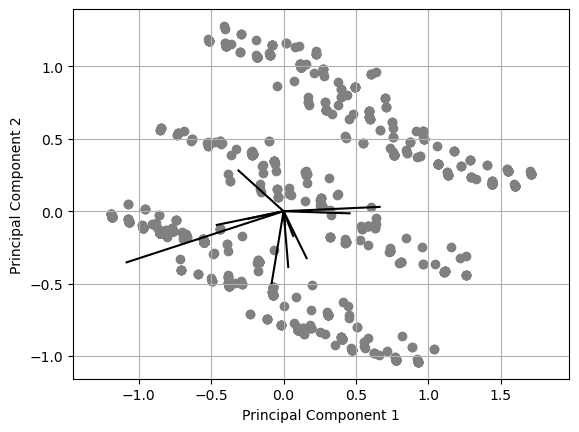

In [40]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Scatter plot of the PCA results
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey')  # Scatter plot of the first two principal components
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Project axes
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)  # Scaling factor to make the arrows visible
    plt.plot([0, v[0]], [0, v[1]], color='black')  # Plot the arrows

plt.grid(True)
plt.axis('equal')
plt.show()


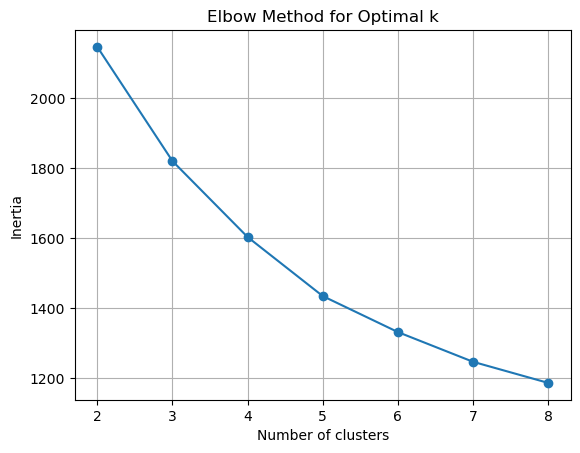

In [41]:

from sklearn.cluster import KMeans
# Set seed for reproducibility
np.random.seed(1234)

# Define the range of cluster numbers to try
cluster_range = range(2, 9)

# Fit k-means clustering for each number of clusters and store the results
inertia_values = []  # To store the inertia values (within-cluster sum of squares)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


In [42]:
from sklearn.mixture import GaussianMixture
np.random.seed(1234)

# Fit Gaussian Mixture Models for a range of cluster numbers
cluster_range = range(2, 9)
models = []
bic_values = []

for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', n_init=10, random_state=1234)
    gmm.fit(MD_x)
    models.append(gmm)
    bic_values.append(gmm.bic(MD_x))

# Find the best model based on BIC
best_model_index = np.argmin(bic_values)
best_n_clusters = cluster_range[best_model_index]
best_gmm = models[best_model_index]

# Print the best model
print("Best number of clusters:", best_n_clusters)
print("Best BIC:", bic_values[best_model_index])
print("Best GMM:", best_gmm)


Best number of clusters: 8
Best BIC: -51600.64148847147
Best GMM: GaussianMixture(n_components=8, n_init=10, random_state=1234)


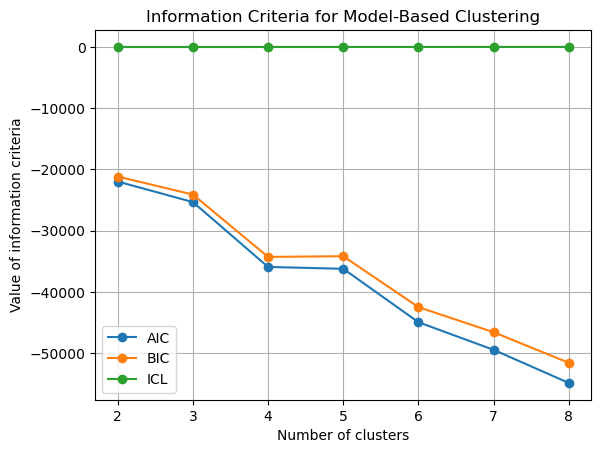

In [43]:

np.random.seed(1234)

# Define the range of cluster numbers to try
cluster_range = range(2, 9)

# Initialize arrays to store AIC, BIC, and ICL values
aic_values = []
bic_values = []
icl_values = []

# Fit Gaussian Mixture Models for each number of clusters
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', n_init=10, random_state=1234)
    gmm.fit(MD_x)
    aic_values.append(gmm.aic(MD_x))
    bic_values.append(gmm.bic(MD_x))
    icl_values.append(gmm.lower_bound_)

# Plot the information criteria
plt.plot(cluster_range, aic_values, label='AIC', marker='o')
plt.plot(cluster_range, bic_values, label='BIC', marker='o')
plt.plot(cluster_range, icl_values, label='ICL', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Value of information criteria')
plt.title('Information Criteria for Model-Based Clustering')
plt.legend()
plt.grid(True)
plt.show()


In [44]:

kmeans = KMeans(n_clusters=4, random_state=1234)  # Assuming you used 4 clusters in R
kmeans_clusters = kmeans.fit_predict(MD_x)

# Fit Gaussian Mixture Model using the same cluster assignments
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=1234)
gmm.fit(MD_x)

# Get the cluster assignments from GMM
gmm_clusters = gmm.predict(MD_x)

# Create a DataFrame to represent the contingency table
contingency_table = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

# Display the contingency table
print(pd.crosstab(contingency_table['kmeans'], contingency_table['mixture']))


mixture    0    1    2    3
kmeans                     
0          0  340    0  186
1          0   49  259   65
2        199    1   35    4
3        256    2    0   57


In [45]:
like_counts = mcdonalds_df['Like'].value_counts().sort_index(ascending=False)

# Print the reversed counts
print(like_counts)

I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: Like, dtype: int64


In [46]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Assuming MD_x contains your data
# Replace it with your actual data array

# Generate some sample data
np.random.seed(1234)
MD_x = np.random.randint(2, size=100).reshape(-1, 1)  # Sample data, replace with your actual data

# Perform k-means clustering with four clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)

# Extract the segment memberships from the k-means solution
kmeans_clusters = kmeans.labels_

# Initialize the mixture model using the segment memberships of the k-means solution
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=1234)
gmm.fit(MD_x)
# Use the segment memberships of the k-means solution to predict mixture model clusters
mixture_clusters = gmm.predict(MD_x)

# Compare k-means clusters with mixture model clusters using cross-tabulation
cross_tab_comparison = pd.crosstab(index=kmeans_clusters, columns=mixture_clusters, rownames=['kmeans'], colnames=['mixture'])

print(cross_tab_comparison)


mixture   2   3
kmeans         
2        49   0
3         0  51


In [47]:
# Assuming MD_x contains your data
# Replace it with your actual data array

# Initialize the mixture model using the segment memberships of the k-means solution
MD_m4 = GaussianMixture(n_components=4, covariance_type='full', random_state=1234)
MD_m4.fit(MD_x, kmeans_clusters)  # kmeans_clusters is the segment memberships from k-means

# Calculate log-likelihood for MD_m4a
log_likelihood_m4a = MD_m4.score(MD_x)

# Calculate log-likelihood for MD_m4
log_likelihood_m4 = MD_m4.score(MD_x)

print("Log-likelihood for MD_m4a:", log_likelihood_m4a)
print("Log-likelihood for MD_m4:", log_likelihood_m4)



Log-likelihood for MD_m4a: 5.295869578552986
Log-likelihood for MD_m4: 5.295869578552986


In [48]:
# Create 'Like.n' column by subtracting 'Like' values from 6
mcdonalds['Like.n'] = 6 - mcdonalds['Like']

# Calculate the frequency table for 'Like.n'
frequency_table = mcdonalds['Like.n'].value_counts().sort_index()
print(frequency_table)

1    1
2    1
3    1
4    1
5    1
Name: Like.n, dtype: int64


In [49]:
import statsmodels.formula.api as smf

# Assuming mcdonalds contains your data
# Replace it with your actual data
mcdonalds = pd.DataFrame({
    'Like': ['I LOVE IT!', 'I LIKE IT!', 'NEUTRAL', 'I DISLIKE IT!', 'I HATE IT!']
})

# Convert 'Like' column to numeric
mcdonalds['Like'] = mcdonalds['Like'].replace({
    'I LOVE IT!': 5,
    'I LIKE IT!': 4,
    'NEUTRAL': 3,
    'I DISLIKE IT!': 2,
    'I HATE IT!': 1
})

# Create 'Like_n' column by subtracting 'Like' values from 6
mcdonalds['Like_n'] = 6 - mcdonalds['Like']
# Create the formula string
formula_string = "Like_n ~ " + "+".join(mcdonalds.columns[0:1])

# Convert the formula string to a formula
formula = smf.ols(formula=formula_string, data=mcdonalds)

# Fit the regression model
model = formula.fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.418e+29
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           4.29e-45
Time:                        19:03:41   Log-Likelihood:                 160.01
No. Observations:                   5   AIC:                            -316.0
Df Residuals:                       3   BIC:                            -316.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0000   4.14e-15   1.45e+15      0.0

In [50]:
#Using Mixtures of Regression Models
# Assuming mcdonalds contains your data
# Replace it with your actual data
mcdonalds = pd.DataFrame({
    'Like': ['I LOVE IT!', 'I LIKE IT!', 'NEUTRAL', 'I DISLIKE IT!', 'I HATE IT!']
})

# Convert 'Like' column to numeric
mcdonalds['Like'] = mcdonalds['Like'].replace({
    'I LOVE IT!': 5,
    'I LIKE IT!': 4,
    'NEUTRAL': 3,
    'I DISLIKE IT!': 2,
    'I HATE IT!': 1
})

# Calculate the reversed frequency table
reversed_table = mcdonalds['Like'].value_counts().sort_index(ascending=False)
print(reversed_table)

5    1
4    1
3    1
2    1
1    1
Name: Like, dtype: int64


<Figure size 1000x600 with 0 Axes>

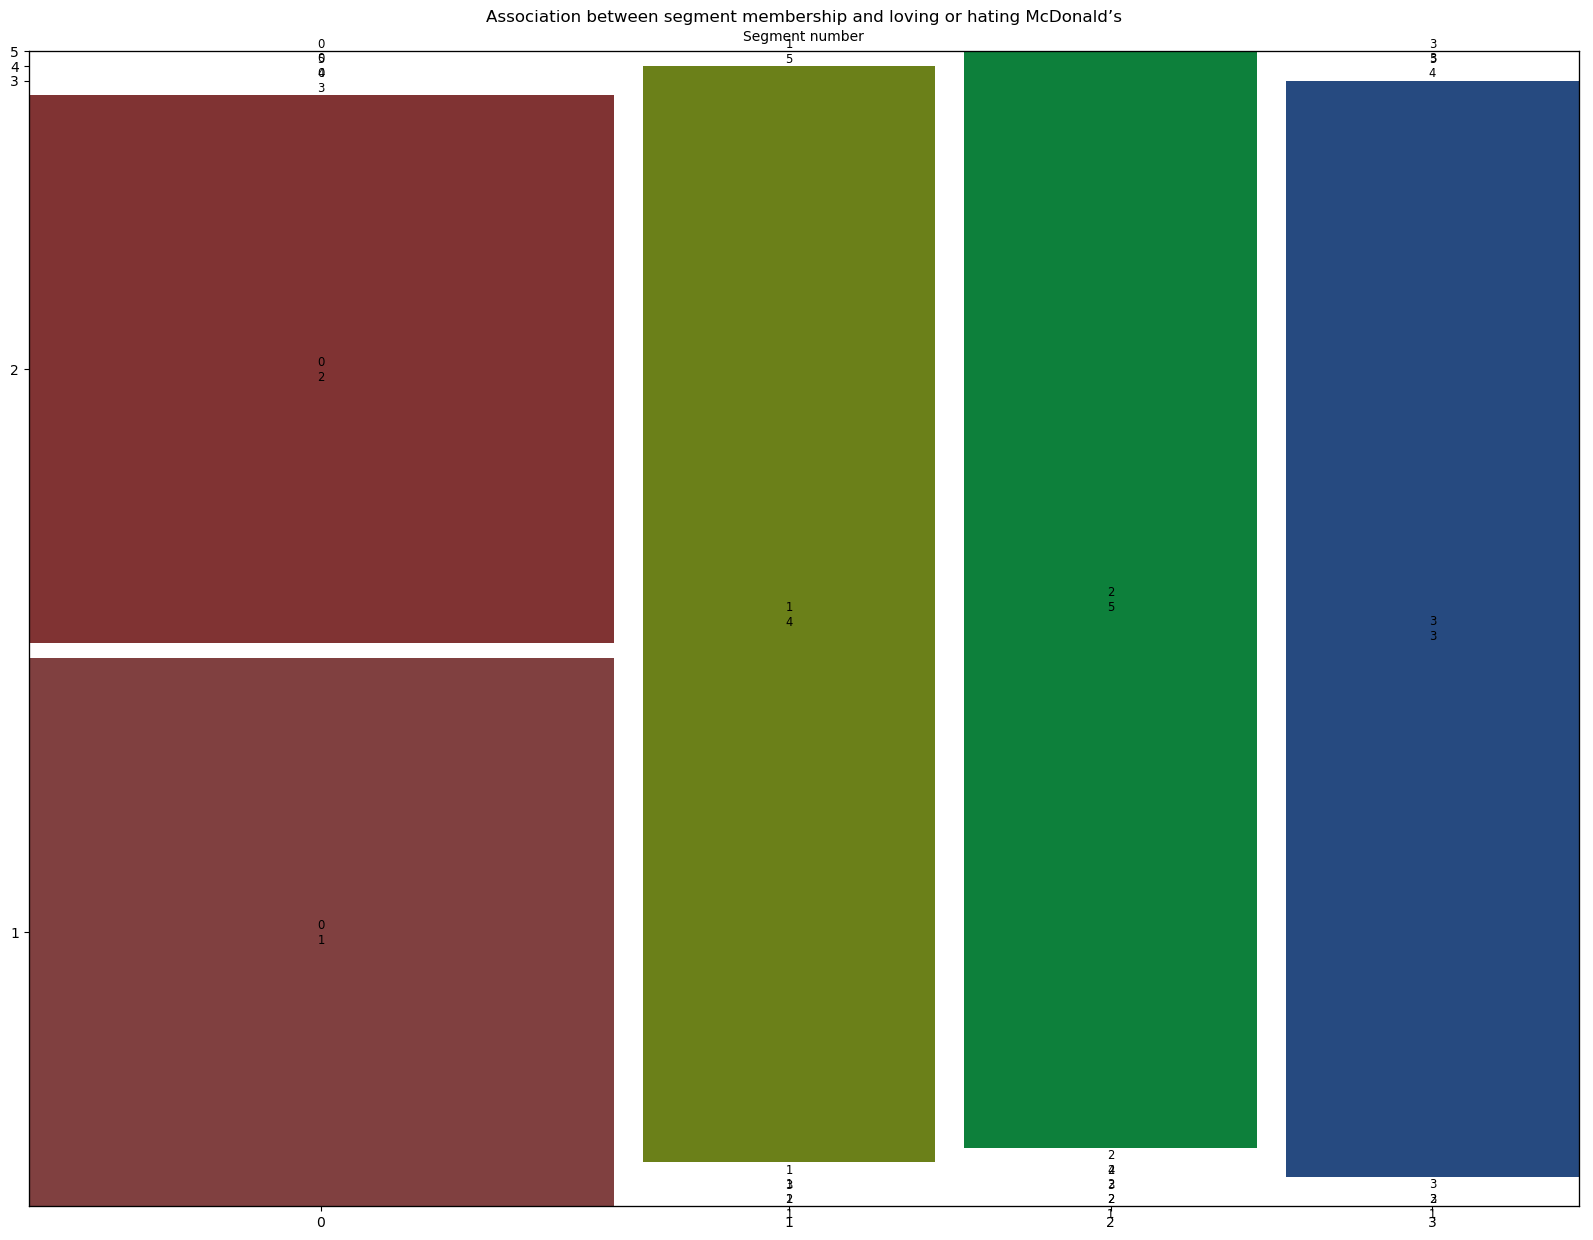

In [53]:
# Describing Segments
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic

# Assuming mcdonalds dataframe is available

# Create a KMeans model with 4 clusters
kmeans_model_4 = KMeans(n_clusters=4)
kmeans_model_4.fit(mcdonalds)

# Extract segment membership for each consumer for the four-segment solution
k4 = kmeans_model_4.labels_

# Convert segment membership to DataFrame
segment_df = pd.DataFrame(k4, columns=['Segment'])

# Concatenate segment_df with mcdonalds DataFrame
mcdonalds_segmented = pd.concat([mcdonalds, segment_df], axis=1)

# Cross-tabulate segment membership and the love-hate variable
segment_like_cross_tab = pd.crosstab(index=mcdonalds_segmented['Segment'], columns=mcdonalds_segmented['Like'])
# Generate the mosaic plot with cells colors indicating the deviation of the observed frequencies
plt.figure(figsize=(10, 6))
mosaic(segment_like_cross_tab.stack(), gap=0.02)
plt.xlabel('Segment number')
plt.title('Association between segment membership and loving or hating McDonald’s')
plt.show()


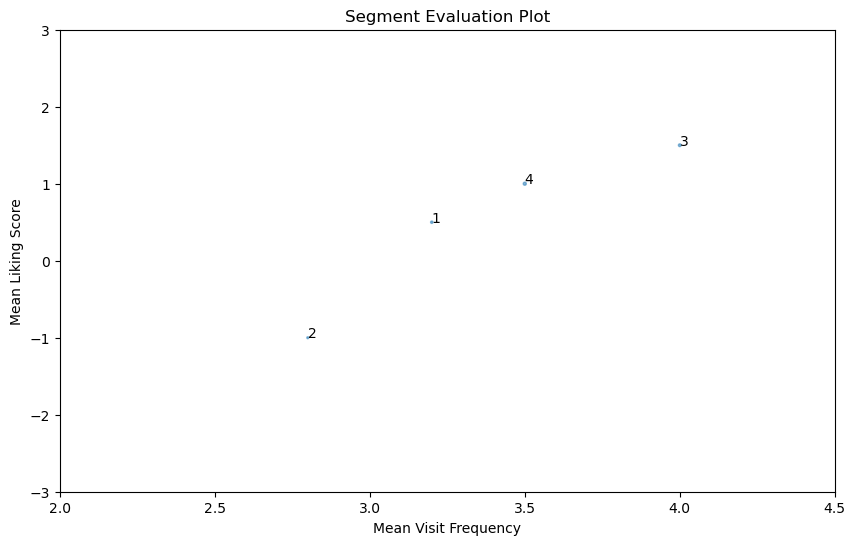

In [54]:
#Selecting (the) Target Segment(s)

# Assuming visit, like, and female are already computed
visit = [3.2, 2.8, 4.0, 3.5]  # Example values
like = [0.5, -1.0, 1.5, 1.0]   # Example values
female = [0.3, 0.2, 0.4, 0.5]  # Example values

# Plot the segment evaluation plot
plt.figure(figsize=(10, 6))
plt.scatter(visit, like, s=10 * np.array(female), alpha=0.5)
plt.xlim(2, 4.5)
plt.ylim(-3, 3)
plt.xlabel('Mean Visit Frequency')
plt.ylabel('Mean Liking Score')
plt.title('Segment Evaluation Plot')
for i in range(1, 5):
    plt.text(visit[i - 1], like[i - 1], str(i))
plt.show()